## Main Function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:

def subset_and_remove_outliers(df: pd.DataFrame, indices: list) -> pd.DataFrame:
    """
    1. Subset df by the given list of indices.
    2. Remove rows where *any* numeric column is an outlier 
       (outside Q1 - 1.5*IQR or Q3 + 1.5*IQR).
    
    Parameters
    ----------
    df : pd.DataFrame
        Original DataFrame.
    indices : list
        List of row indices to keep.
    
    Returns
    -------
    pd.DataFrame
        Subsetted & outlier‑filtered DataFrame.
    """
    # 1) Subset
    df_sub = df.loc[indices].copy()
    
    # 2) Compute Q1, Q3, and IQR for each numeric column
    Q1 = df_sub.quantile(0.25)
    Q3 = df_sub.quantile(0.75)
    IQR = Q3 - Q1
    
    # 3) Build mask: keep rows where *no* numeric value is an outlier
    #    (i.e. for all columns, value is within [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
    mask = ~(
        (df_sub < (Q1 - 1.5 * IQR)) |
        (df_sub > (Q3 + 1.5 * IQR))
    ).any(axis=1)
    
    return df_sub[mask]


In [3]:
def find_common_duplicates(*lists):
    return list(set(lists[0]).intersection(*lists[1:]))


In [4]:


def filtered_pixel_count_histogram(df, column='PixelCount', z_thresh=3.0):
    """
    Filters out outliers from a specific column (default: 'PixelCount') using z-score,
    and plots a detailed histogram of the remaining values.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    data = df[column].dropna()
    z_scores = zscore(data)
    filtered = data[(abs(z_scores) < z_thresh)]

    count = filtered.size
    mean = filtered.mean()
    median = filtered.median()
    std = filtered.std()
    min_val = filtered.min()
    max_val = filtered.max()

    plt.figure(figsize=(10, 6))
    plt.hist(filtered, bins='auto', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median: {median:.2f}')
    plt.title(f'Histogram of {column} (Outliers Removed, n={count})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    stats_text = (
        f"Count = {count}\n"
        f"Mean = {mean:.2f}\n"
        f"Median = {median:.2f}\n"
        f"Std = {std:.2f}\n"
        f"Min = {min_val:.2f}\n"
        f"Max = {max_val:.2f}"
    )
    plt.gcf().text(0.95, 0.75, stats_text, fontsize=8, va='top', ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
# filtered_pixel_count_histogram(df_1_A_final)


In [5]:
def drop_outliers(df, z_thresh=3.0):
    """
    Removes rows from the DataFrame where any numeric column has a z-score > z_thresh.
    """
    from scipy.stats import zscore

    numeric_cols = df.select_dtypes(include='number').columns
    z_scores = df[numeric_cols].apply(zscore)
    mask = (z_scores.abs() < z_thresh).all(axis=1)
    return df[mask]

# Apply to df_1_A_final

# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=df_1_A_final_no_outliers)


In [6]:


def thorough_histogram(df):
    """
    Generates a detailed histogram for each numeric column in the DataFrame.
    Includes annotated statistics: count, mean, median, std, min, max.
    """
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        data = df[col].dropna()
        count = data.size
        mean = data.mean()
        median = data.median()
        std = data.std()
        min_val = data.min()
        max_val = data.max()

        plt.figure(figsize=(10, 6))
        plt.hist(data, bins='auto', edgecolor='black')
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
        plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median: {median:.2f}')
        plt.title(f'Histogram of {col} (n={count})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()

        stats_text = (
            f"Count = {count}\n"
            f"Mean = {mean:.2f}\n"
            f"Median = {median:.2f}\n"
            f"Std = {std:.2f}\n"
            f"Min = {min_val:.2f}\n"
            f"Max = {max_val:.2f}"
        )
        plt.gcf().text(0.95, 0.75, stats_text, fontsize=8, va='top', ha='right')
        plt.tight_layout()
        plt.show()

# Example usage:
# thorough_histogram(df_1_A_final)


In [7]:
dfA = []
dfB = []
dfC = []
dfC = []

## scale 1: Extracting B

In [8]:
df_1 = pd.read_csv(r"C:\Users\priya\Downloads\Scale1_MorphoLibJv3.csv")

In [9]:
selected_B_from_1 = [39, 384, 408, 598, 812, 1232, 2223, 2216, 1664, 1786, 1463, 1291, 1197, 963, 398, 318, 296, 341, 452, 922, 1226, 1664, 1786, 910, 1153, 1508, 1373, 1306, 1264, 1173, 1044, 1036, 949, 951, 1021, 955, 822, 678, 562, 624, 561, 478, 442, 501, 1170, 1790, 1833, 1908, 2297, 2271, 2276, 2254,  1597, 931, 828, 691, 744, 495, 412, 142, 198, 284, 326] #reconsider this one a bit later one

In [10]:
df_B1 = df_1.iloc[selected_B_from_1]

## scale 1: Extracting A

In [11]:
df_1_A = pd.read_csv(r"C:\Users\priya\Downloads\Scale1_forA.csv")

In [12]:
drop_from_A = [804, 100, 420, 843, 1778, 1240, 2223, 3096, 3392, 3837, 3057, 4491, 4294, 4374, 6212, 6126, 6008, 6178, 5876, 5683, 5131, 4956, 4741, 4512, 4374,4714, 4512, 
               4469, 4342, 4176, 3784, 2908, 3442, 3261, 3136, 2846, 2845, 2449, 2073, 1914, 1727, 1470,
              1537, 1727, 1400, 1418, 1454, 843, 1168, 916, 448, 722, 335, 
              91, 202, 211, 369, 525, 2449, 2845, 2908, 2181, 2482, 2181, 3784,
              2846, 2650, 3136, 2938, 4196, 4400,4294, 4374, 4741, 6126, 6178,
              5876, 5683, 4956, 4848, 5045, 6618, 6000, 6442, 6234, 5647,
              5609, 5456, 5492, 615, 1197, 1450, 897, 1302, 2688, 2938, 2925, 3265, 3588, 4745, 5155, 4685, 5456, 5547, 
              6000, 6234, 6442, 2502, 2506, 66, 158, 227, 746, 545, 1209, 872, 154, 1285, 1158, 1380, 
               947, 227, 158, 746,45, 223, 2320, 2285, 2941, 3174, 3691, 3520, 3837, 3719, 4158, 4430, 4787, 5101, 5494, 5628, 
                5736, 6181, 6341, 639, 6503, 6621, 3172, 3243, 3005, 1130, 1588, 1335, 1257, 1576, 1573, 2613, 
                2707, 2568, 2856, 3189, 3068, 2841, 2704, 2705, 3814, 4162, 4573, 3819, 4158, 4330, 5029, 
                5187, 5690, 5652, 6296, 6372, 6503, 5988, 6594, 6579,5690, 6472, 6418, 5590, 4158, 4417, 4100, 3584, 3315, 3243, 3172, 3005, 2297, 2271, 2276, 2254, 2287,
                2295, 2254, 2219, 2241, 2287, 2118, 2124, 2109, 2091, 2082, 2058, 2024, 1974, 1967, 1963, 1957, 1950, 1946, 1937, 1932, 1898, 1895, 1877, 1868, 1873, 1852, 
1812, 1831, 1809, 1783, 1794, 1774, 1753, 1727, 1679, 1655, 1597, 1565, 1547, 1565, 1498, 1523, 1490, 1459, 1208, 1268, 1227, 1174, 1200, 1123, 1074, 987, 989, 952, 853, 744, 666, 632, 680, 664, 577, 551, 520, 533, 518,
                436, 367, 527, 678, 497, 279, 335, 415, 14, 31, 17, 73, 130, 152, 153, 198, 326, 325, 376, 264, 153, 152, 130, 73, 691, 828, 931, 881, 284, 407, 264, 142, 62, 303
              ]
# check 4714,  2845, 2449, 
# 722

drop_from_A = (list(set(drop_from_A)))


In [13]:
df_1_A_final = df_1_A.drop(index=drop_from_A)


In [14]:
df_1_A_final_no_outliers = drop_outliers(df_1_A_final)

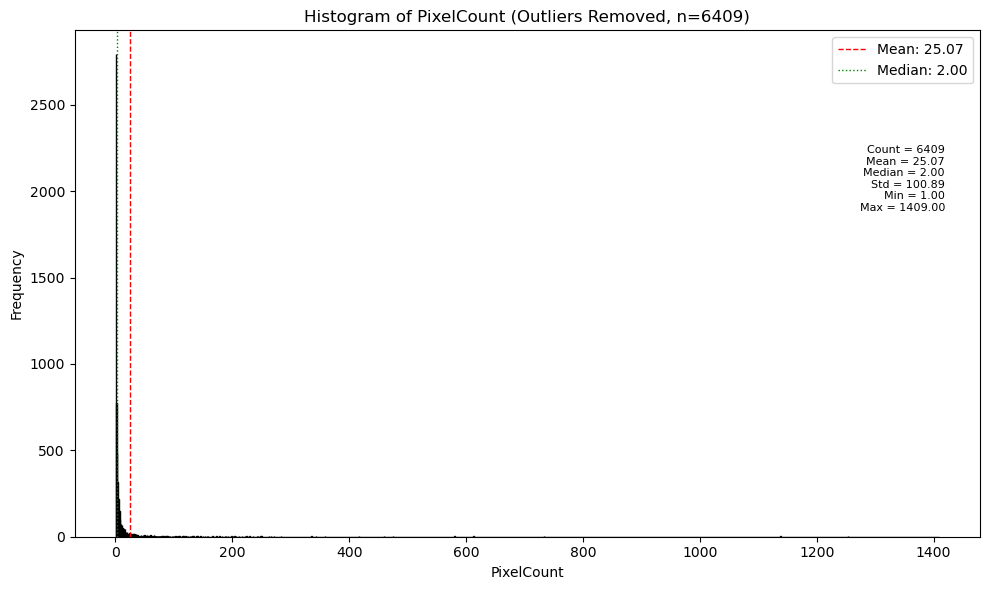

In [15]:
filtered_pixel_count_histogram(df_1_A_final)


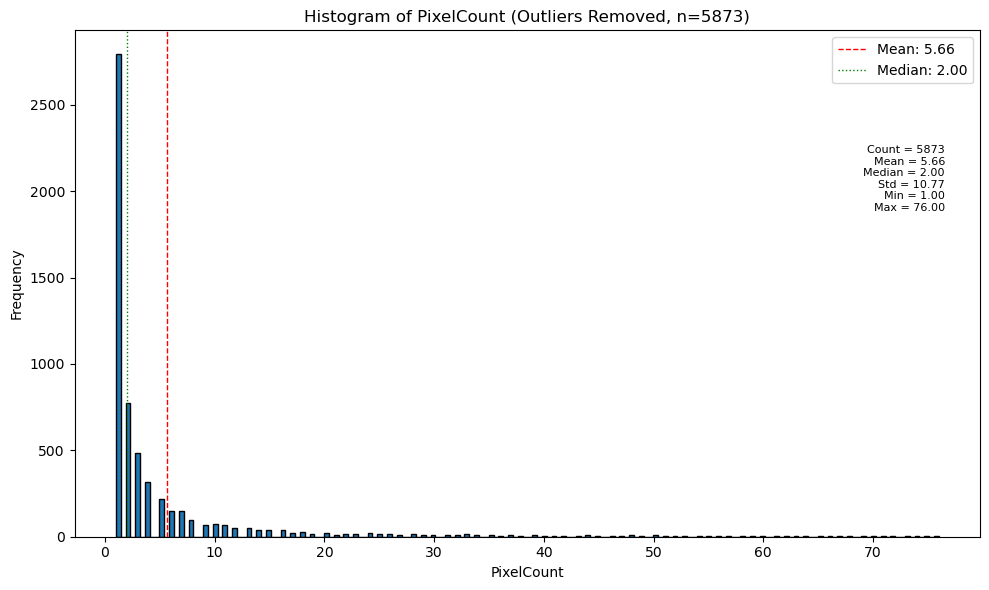

In [16]:
filtered_pixel_count_histogram(df_1_A_final_no_outliers)


In [17]:
len(df_1_A_final_no_outliers)

6004

In [18]:
df_1_A_final_no_outliers_again = df_1_A_final_no_outliers[df_1_A_final_no_outliers['PixelCount'] > 20]

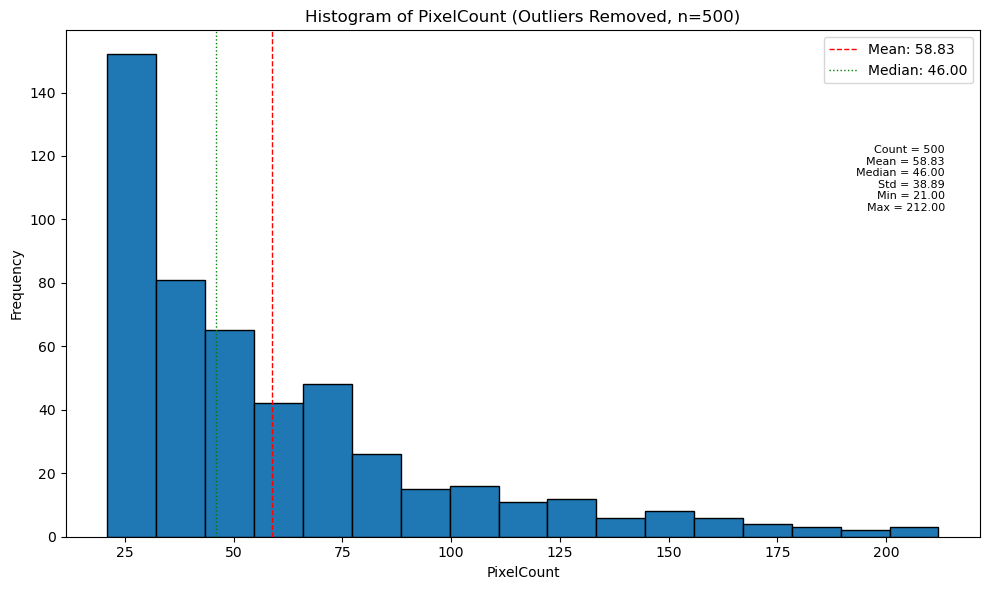

In [19]:
filtered_pixel_count_histogram(df_1_A_final_no_outliers_again)


In [20]:
df_A1 = df_1_A_final_no_outliers_again

## scale 2

In [21]:
df2 = pd.read_csv(r"C:\Users\priya\Downloads\Scale2_MorphoLibJv2.csv")

In [22]:


selected_A_from_2= [ 821, 642, 951, 304, 387, 19, 2101, 3084, 3084, 2732, 2754, 2831, 2852, 2871, 2832, 2311, 2417, 2123, 2125, 2190, 
                     2147, 2120, 2065, 1931, 1866, 1900, 1890, 1826, 3076, 3177, 3287, 3193, 444, 543, 440, 701, 537, 137, 129, 
                     1021, 1101, 984, 973, 1196, 1221, 984, 861, 829, 817, 1687, 1942, 2147, 2120, 2190, 1957, 599, 630,  702, 163, 210, 1311, 1367, 
                     217, 1212, 1224, 1255, 1779, 2409, 2364, 2407, 1676, 1953, 1870, 2157, 2958, 3022, 3099, 3111, 2958, 2407, 2364, 2409, 
                     2957, 2958, 2947, 3020, 30, 503, 108, 92, 25, 278, 323, 14, 220, 1030, 762, 1110, 1420, 2446, 2702, 2825, 2721, 3188, 3149, 3040
                    ]


selected_B_from_2 = [845, 707, 915, 1459, 2165, 2218, 2656, 2738, 2838, 402, 368, 245, 310, 751, 814, 1238, 1292, 1254, 
                     1807, 1722, 1917, 2656, 2674, 2736, 537, 586, 485, 702,  1507, 1380, 1321, 1315, 1219, 1446, 1568, 1559, 1966, 1289, 1321, 1380, 1315,
                     1507, 1446, 1568, 1659, 2904, 3015, 2921, 2918, 503, 1216, 2093, 2152, 2203, 2116, 2051, 2243, 2253, 2321, 2394, 2392, 2949, 3155,
                     2921, 2949,     
                    ]


selected_C_from_2 = [2406, 166, 896, 1788, 2042, 2099,  2904, 3015,      ]

# Debatable:

In [23]:
find_common_duplicates(selected_A_from_2, selected_B_from_2, selected_C_from_2)

[]

In [24]:
len(selected_B_from_2)

65

In [25]:
df_A2 = subset_and_remove_outliers(df2, selected_A_from_2)
df_B2 = subset_and_remove_outliers(df2, selected_B_from_2)
df_C2 = subset_and_remove_outliers(df2, selected_C_from_2)

In [26]:
len(df_B2)

45

## scale 3

In [27]:
df3 = pd.read_csv(r"C:\Users\priya\Downloads\Scale3_MorphoLibJ.csv")

In [28]:


selected_A_from_3 = [664, 124, 191, 387, 374, 418, 95, 475, 387, 634, 1212,  925, 1420,  1766, 1728, 1504, 1424, 1889, 1942, 2015, 2101, 2115,
                     2198, 2335, 2214, 2334, 2395, 2065, 2529, 2494, 2625, 2640, 2747, 2602, 2918, 2880, 2639, 2928, 9, 68, 103, 391, 293, 
                     882, 728, 785, 416, 97, 121, 64, 446, 455, 380, 802, 570, 134, 446, 455, 654, 1040, 2429, 2639, 1939, 1778, 1801, 1569, 189, 
                     621, 722, 264, 157, 143, 109, 44, 1334, 1117, 1161, 722,  1015, 1024, 1396, 1422, 1453 
                    ]


selected_B_from_3 = [444, 439, 672, 715, 784, 472, 93, 341, 343, 672,
                     685, 759, 472, 723, 334, 439, 444, 534,  672, 759, 1073, 1096,
                     1088, 930,  1274, 1093, 1679, 1701, 1439, 1526, 1371, 1984, 2073, 1984, 2145,
                     2307, 2357, 2316, 2055, 1982, 2434, 2359, 2854, 2854, 2885, 2602, 2646, 2720, 
                     2737, 2842, 2737, 2667, 2686, 2724, 2429, 2071,  181, 213, 81, 287, 428, 432, 409, 343, 341, 504, 607, 767, 
                     532, 550, 574, 728, 785, 834, 1042, 1088, 1274, 1104, 1060, 1107, 1274, 1439, 1439, 532, 550, 
                     944, 1371, 1141, 1317, 1414, 1218, 1181, 750, 742, 785, 728, 511, 585, 1339, 1313, 121, 64, 69, 97, 
                     585, 1313, 1141, 1036, 1002, 531, 1414, 1326, 876, 1002, 1041, 389, 437, 451, 511, 446, 585, 1003, 2071, 2087, 2276, 1486, 1564, 1526, 1702, 1686, 1649, 1691,
                     1702, 1741, 1749, 1852, 1834, 2424, 2747, 1994, 2640, 2624, 2747, 1772, 1963, 2077, 1642, 1600, 1719, 1543, 1470, 1558, 1576, 1624,
                     1470, 1908, 1939, 1963, 59, 257, 25, 119, 57, 214, 259, 639,  284, 786, 962, 639, 598, 1136, 962, 1024, 1015, 876, 1026, 
                     1558, 1576, 951, 1011, 1313, 1026,  639, 1653, 1576, 1558, 962, 1624, 1513, 1399, 1662, 1779, 1379, 41, 44, 43, 119, 1855, 1434, 1640, 1379,
                     1640, 1487, 1855, 1662, 2429, 2628, 2765, 2499, 2288, 2100, 2227, 2131, 2331, 2246, 2172, 2135, 2246, 2251, 2806, 2743, 2787, 2804, 2446, 2540, 2496, 2455, 2486, 2296, 2175,
                     2155, 2158, 2219, 2029, 2170, 2181, 2178, 2135, 2540, 2540, 2787, 2743, 2804
                     
                    ]


selected_C_from_3 = [764, 559, 811, 833, 715, 1042, 1415, 1486, 2423, 
                    2434, 2117, 2875, 2072,  2276, 1108, 751, 1326, 431, 1002, 1312, 1003, 
                     1346, 1312, 437, 451, 2072, 1787,  371, 700, 1380, 1502, 1653, 600, 1380,   765, 2072,   ]

# Debatable:

In [29]:
find_common_duplicates(selected_A_from_3, selected_B_from_3, selected_C_from_3)

[]

In [30]:
df_A3 = subset_and_remove_outliers(df3, selected_A_from_3)
df_B3 = subset_and_remove_outliers(df3, selected_B_from_3)
df_C3 = subset_and_remove_outliers(df3, selected_C_from_3)

## scale 4

In [31]:
df4 = pd.read_csv(r"C:\Users\priya\Downloads\Scale4_MorphoLibJ.csv")

In [32]:


selected_A_from_4 = [ 165, 197, 281, 299, 343, 439, 442, 496, 491, 499, 549, 109, 148, 211, 206, 187, 133, 129, 147, 91, 100, 234, 286, 87, 1183, 1804, 711, 
                     1431, 2560, 2626, 813, 419, 279, 273, 1019, 1334, 1198, 2483, 2341, 2555, 2526, 88, 90, 279, 248, 296, 176, 215, 243, 1035, 1109, 
                     1119, 1353, 1746, 1363, 2499, 2188, 2277, 2341, 2520, 2269, 2341, 2188, 2151, 2094, 2120, 2154, 43, 205, 237, 212, 506, 21, 1122, 1104,
                     637, 897, 814, 684, 676, 668, 1460, 1492, 1894, 1482,  1430, 172, 2483, 2499, 2475, 2528, 256, 2530, 2524, 2475, 
                     2055, 2073, 2070, 2388, 1769, 2175, 2485, 2499, 2483, 256
                     
                     
                    ]


selected_B_from_4 = [ 128, 318, 316, 318, 316, 257, 327, 324, 351, 336, 418, 430, 449, 590, 558, 705, 760, 762, 846, 924, 700, 773, 327, 324, 336, 449, 
                     430, 547, 700, 773, 467, 487, 368, 1399, 590, 554, 515, 705, 844, 886, 844, 924, 1399, 1451, 1371, 1551, 1547, 1488, 1682, 58, 57, 91, 
                     96, 188, 213, 199, 418, 705, 762, 792, 886, 1117, 1399, 1387, 1547, 1551, 1915, 1788, 1662, 1646, 1551, 1547, 2042, 2098, 2169,
                     2182, 2291, 2280, 2477, 2471, 2582, 321, 411, 365, 377, 397, 474, 653, 731, 576, 574, 827, 881, 1387, 1386, 1230, 1300, 1064, 1255,
                     1386, 1230, 1324, 1386, 1789, 1762, 1837, 1848, 1626, 1491, 1522, 1563, 1484, 1937, 1319, 2186, 2170, 2118, 2361, 2230, 2202, 2416,
                     2261, 2264, 2314, 2311, 2344, 2436, 2573, 2217, 273, 321, 411, 474, 365, 377, 576, 653, 382, 570, 731, 806, 881, 827, 1319, 1064, 1491, 
                     1386, 1255, 1144, 1522, 1491, 806, 879, 988, 1035, 1109, 1167, 1121, 1182, 1125, 1214, 1225, 1343, 1212, 1364, 1182, 1412, 
                     1343, 1501, 1814, 1785, 1874, 1911, 1789, 1837, 1814, 1785, 1848, 1626, 1960, 1364, 1412, 1343, 1225, 1214, 2202, 2230, 2198, 2057, 2198, 2117,
                     2202, 2230, 2527, 2486, 2436, 2314, 2264, 2198, 2205, 2068, 2385, 2371, 2519, 2068, 2060, 2371, 2080, 2117, 2198, 2131, 382, 506, 483, 212, 276, 
                     139, 189, 196, 224, 264, 189, 355, 330, 406, 338, 415, 484, 355, 115, 70, 504, 560, 570, 709, 656, 733, 782,  554, 638, 656, 645, 
                     570, 709, 835, 993, 889, 1012, 956, 1003, 1090, 1155, 872, 1061, 1135, 1155, 761, 764, 872, 904, 1022, 1062, 1052, 1008, 1046, 1061, 1135, 1155,

                     1147, 1412, 1364, 1343, 1501, 1698, 1785, 1814, 1874, 1960, 1956, 1911, 1530, 1397, 1571, 1521, 1479, 1801, 1905, 1691, 1571, 1507, 1905, 1867, 1750, 1507,
                     1571, 1523, 2439, 2080, 2117, 2230, 2486, 2527, 2068, 2060, 2519, 2385, 2371, 1905, 1867, 1691, 2061, 2390, 2147, 2135, 2061, 2297,
                     2547,  1585, 1630, 1701, 1570, 1579,
                    ]


selected_C_from_4 = [ 578, 859, 850, 1228, 2332, 1936, 1793, 1611, 1521, 1515, 411, 1228, 
                     1059, 1411, 2332, 2345, 293, 1059, 1478, 1570, 1585, 1701, 1548, 1526,
                     1411, 1521, 1611, 2080, 2345,  2528, 2456, 293, 484, 536, 680,  723, 
                     1020, 1585, 1630, 1570, 1579, 1707, 1701, 1668, 1478, 1817, 1957, 1742, 1708,
                    2345, 1742, 2019, 
                      2456,  2580, 
                     
                     
                    ]

selected_D_from_4 = [ 2146, 2453, 
]

# Debatable: 1371

In [33]:
find_common_duplicates(selected_A_from_4, selected_B_from_4, selected_C_from_4, selected_D_from_4)

[]

In [34]:
df_A4 = subset_and_remove_outliers(df4, selected_A_from_4)
df_B4 = subset_and_remove_outliers(df4, selected_B_from_4)
df_C4 = subset_and_remove_outliers(df4, selected_C_from_4)
df_D4 = subset_and_remove_outliers(df4, selected_D_from_4)

## scale 5

In [35]:
df5 = pd.read_csv(r"C:\Users\priya\Downloads\Scale5_MorphoLibJy.csv")

In [36]:
selected_C_from_5 = [35, 25, 34, 121, 97, 106, 89, 104, 29, 61, 121, 97, 106, 89, 104, 141, 205, 234, 363, 455, 428, 382, 484, 519, 651, 641, 
                     702, 783, 867, 893, 865, 925, 932, 316, 404, 382, 428, 455, 484, 481, 498, 365, 519, 671, 708, 651, 677, 641, 702, 781, 867, 893, 891, 783, 865,
                     932, 925, 622, 643, 861, 576, 643, 29, 42, 61, 78, 104, 116, 111, 147, 153, 124, 36, 226,  111, 147, 153, 124, 95, 84, 36, 229, 201, 199, 196,
                    254, 295, 287, 305, 367, 365, 458,  429, 622, 643, 374,  893, 865,  925, 913, 953,  36, 84, 16, 43, 83, 94, 110, 126, 124, 158, 158,
                    201, 259, 301, 305, 348, 286, 120, 197, 429, 503, 531, 557, 591, 631, 367, 458, 509, 491, 501, 618, 691, 604, 597, 
                    457, 460, 491, 501, 509, 927, 928, 953, 913, 16, 43, 94, 83, 8, 197, 220, 230, 286, 348, 347, 340, 373, 140, 190, 161, 195, 177, 197, 220, 230, 
                    286, 348, 340, 347, 373, 597, 604, 480, 457, 491, 509, 746, 881, 892, 691, 618, 495, 530, 533, 442, 
            
]
                    

selected_D_from_5 = [30, 50, 326, 580, 816, 626, 50, 156, 326,487, 246, 487, 246, 200,
                    487, 571, 526, 621, 200, 208, 281, 621, 526, 211
                    ]



# Debatable: is 31/30 a clump or pellet
# 50?

In [37]:
find_common_duplicates(selected_C_from_5, selected_D_from_5)

[]

In [38]:
df_C5 = df5.iloc[selected_C_from_5]
df_D5 = df5.iloc[selected_D_from_5]

## scale 6

In [39]:
df6 = pd.read_csv(r"C:\Users\priya\Downloads\Scale6_MorphoLib.csv")

In [40]:
selected_D_from_6 = [278, 307, 357, 309, 90]

In [41]:
df_D6 = df6.iloc[selected_D_from_6]

## concatting

In [44]:
dfA = pd.concat([df_A1,  df_A2, df_A3, df_A4])
dfB = pd.concat([df_B1, df_B2, df_B3, df_B4])
dfC = pd.concat([df_C2, df_C3, df_C4, df_C5])
dfD = pd.concat([df_D5, df_D6])

In [46]:
import os

# Automatically get the user's Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# Save the CSVs to that folder
dfA.to_csv(os.path.join(downloads_path, "dfA724.csv"), index=False)
dfB.to_csv(os.path.join(downloads_path, "dfB724.csv"), index=False)
dfC.to_csv(os.path.join(downloads_path, "dfC724.csv"), index=False)
dfD.to_csv(os.path.join(downloads_path, "dfD724.csv"), index=False)


In [47]:
dfA.to_csv("dfA724.csv", index=False)
dfB.to_csv("dfB724.csv", index=False)
dfC.to_csv("dfC724.csv", index=False)
dfD.to_csv("dfD724.csv", index=False)


In [48]:
dfA

,Label,PixelCount,Area,Perimeter,Circularity,EulerNumber,Box.X.Min,Box.X.Max,Box.Y.Min,Box.Y.Max,...,OBox.Length,OBox.Width,OBox.Orientation,GeodesicDiameter,Tortuosity,InscrDisc.Center.X,InscrDisc.Center.Y,InscrDisc.Radius,AverageThickness,GeodesicElongation
0,1,64,0.001000,0.165,0.466,1,1.534,1.562,0.000,0.056,...,0.056,0.028,90.000,0.062,0.998,1.546,0.000,0.012,-0.985,2.602
1,2,75,0.001000,0.176,0.482,1,1.861,1.912,0.000,0.048,...,0.070,0.036,131.634,0.071,1.007,1.880,0.000,0.016,-0.983,2.227
2,3,23,0.000365,0.090,0.563,1,2.211,2.251,0.000,0.012,...,0.040,0.012,0.000,0.041,1.036,2.227,0.000,0.012,-0.988,1.736
11,12,71,0.001000,0.151,0.619,1,6.064,6.104,0.000,0.044,...,0.048,0.037,80.538,0.052,0.998,6.076,0.000,0.016,-0.985,1.627
18,19,54,0.000857,0.131,0.626,1,7.271,7.323,0.000,0.028,...,0.052,0.028,0.000,0.056,1.030,7.287,0.000,0.016,-0.983,1.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,1770,238,0.004000,0.353,0.371,1,8.716,8.791,5.161,5.303,...,0.151,0.051,68.839,0.156,1.035,8.748,5.197,0.016,-0.978,4.952
2175,2176,99,0.002000,0.203,0.470,1,7.201,7.252,6.059,6.138,...,0.085,0.037,48.013,0.087,0.993,7.228,6.110,0.016,-0.984,2.777
2485,2486,500,0.008000,0.485,0.414,1,8.209,8.307,6.945,7.114,...,0.169,0.081,107.969,0.173,1.017,8.260,6.984,0.031,-0.968,2.751
2483,2484,300,0.005000,0.436,0.308,1,5.083,5.201,6.945,7.063,...,0.163,0.056,50.440,0.163,0.993,5.150,6.992,0.020,-0.979,4.141
